In [41]:
import re
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer # stemming
from nltk.stem import WordNetLemmatizer # lemmatization
from nltk.corpus import stopwords # stopwords

import emoji

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import sys

In [2]:
eng_stopwords = set(stopwords.words('english'))

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
print(train_df.shape)
print('-'*30)
train_df.head()

146811
------------------------------


,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [5]:
print(test_df.shape)
print('-'*30)
test_df.head()

62918
------------------------------


,review_id,review
0,0,slow delivery
1,1,Dateng goods do not conform pesanan😔
2,2,PSN k its 20 other DTG
3,3,I am expected that it have a frame and painted...
4,4,The product quality is not good.


### To-do list
- Add another output for the functions below: list of words, lowercase, without unicode, emoji, stemmed.
- Change `list of unique stemmed words, lowercase, without unicodes and emojis and stopwords`, don't need uniqueness.

In [6]:
def process_text(text):
    '''
    input: a string representing a document
    output: in order of sequence
        list of unicodes;
        list of emojis;
        list of words, lowercase, without unicodes and emojis;
        list of unique stemmed words, lowercase, without unicodes and emojis and stopwords
    '''
    
    unicodes = []
    emojis = []
    words = []
    stemmed_words = set()
            
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    
    tokenizer1 = RegexpTokenizer(r'\w+')
    # list of words
    words = tokenizer1.tokenize(text)
    words = [word.lower() for word in words]
    
    # list of non-stopwords words
    stopped_tokens = [word for word in words if word not in eng_stopwords]
    
    # list of stemmed words from list of non-stopwords words
    for i in stopped_tokens:
        stemmed_words.add(p_stemmer.stem(i))
    
    emojis = [c for c in text if c in emoji.UNICODE_EMOJI]
    unicodes = re.findall('[\u007f-\uffff]', text)
    
    return ' '.join(unicodes), ' '.join(emojis), ' '.join(words), ' '.join(list(stemmed_words))

In [7]:
new_features = ['unicodes', 'emojis', 'clean text', 'stemmed text']

for feature in new_features:
    train_df[feature] = np.nan
    test_df[feature] = np.nan

In [11]:
%%time
for i in range(train_df.shape[0]):
    print("Processing review #" + str(i+1) + " " * 20, "\r", end="")
    unicodes, emojis, words, stemmed_words = process_text(train_df.loc[i, "review"])
    
    train_df.loc[i, "unicodes"] = unicodes
    train_df.loc[i, "emojis"] = emojis
    train_df.loc[i, "clean text"] = words
    train_df.loc[i, "stemmed text"] = stemmed_words

In [12]:
train_df.head()

,review_id,review,rating,unicodes,emojis,clean text,stemmed text
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,​ ​,,Ga disappointed neat products Meletot Hilsnyaa...,deliveri ga hilsnyaa speed good product disapp...
1,1,"Rdtanya replace broken glass, broken chargernya",1,,,Rdtanya replace broken glass broken chargernya,replac glass rdtanya broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,,,Nyesel bngt dsni shopping antecedent photo mes...,descript super bngt photo even caption accord ...
3,3,Sent a light blue suit goods ga want a refund,1,,,Sent a light blue suit goods ga want a refund,want ga good refund sent light blue suit
4,4,Pendants came with dents and scratches on its ...,1,,,Pendants came with dents and scratches on its ...,chang pendant scratch surfac like colour quick...


In [22]:
%%time
for i in range(test_df.shape[0]):
    print("Processing review #" + str(i+1) + " " * 20, "\r", end="")
    unicodes, emojis, words, stemmed_words = process_text(test_df.loc[i, "review"])
    
    test_df.loc[i, "unicodes"] = unicodes
    test_df.loc[i, "emojis"] = emojis
    test_df.loc[i, "clean text"] = words
    test_df.loc[i, "stemmed text"] = stemmed_words

Wall time: 11min 2s62918                                                                        


In [23]:
test_df.head()

,review_id,review,unicodes,emojis,clean text,stemmed text
0,0,slow delivery,,,slow delivery,deliveri slow
1,1,Dateng goods do not conform pesanan😔,,😔,Dateng goods do not conform pesanan,conform pesanan dateng good
2,2,PSN k its 20 other DTG,,,PSN k its 20 other DTG,psn dtg 20 k
3,3,I am expected that it have a frame and painted...,,,I am expected that it have a frame and painted...,expect sad canvass recommend tarp like paint d...
4,4,The product quality is not good.,,,The product quality is not good,qualiti product good


In [50]:
train_df.to_csv('train_processed.csv', index=False)
test_df.to_csv('test_processed.csv', index=False)

In [46]:
def plot_wordcloud(doc_list, title):
    words = ''
    if hasattr(doc_list, '__iter__'):
        words = " ".join(doc_list)
        
        wordcloud = WordCloud(width = 3000, height = 3000, 
                              background_color ='white',
                              min_font_size = 10).generate(words)

        # plot the WordCloud image                        
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud)
        plt.title(title)
        plt.axis("off") 
        plt.tight_layout(pad = 0) 

        plt.savefig(title + '.png', bbox_inches='tight')
        plt.show()

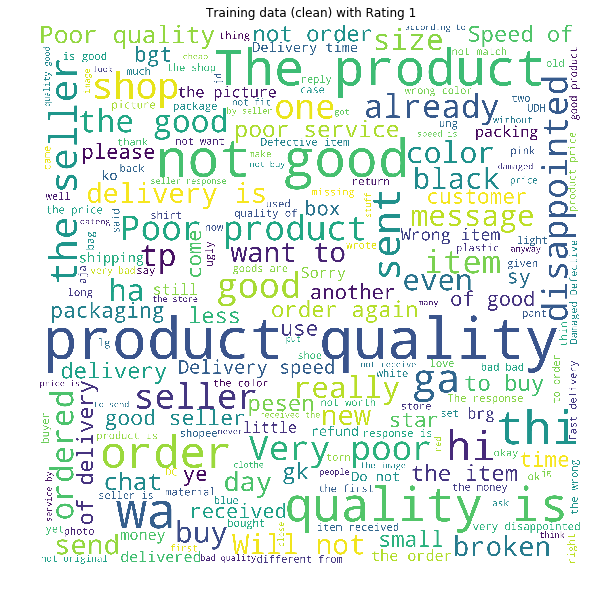

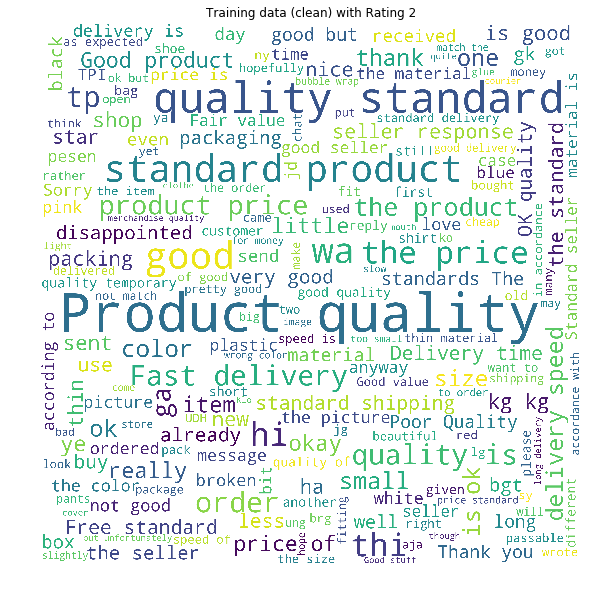

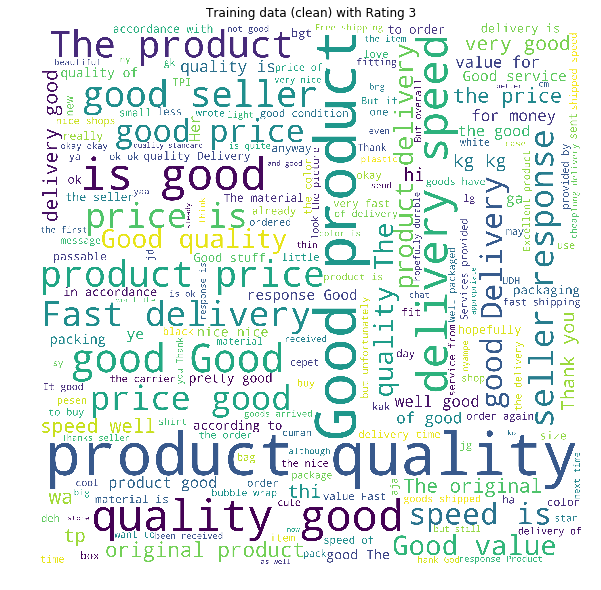

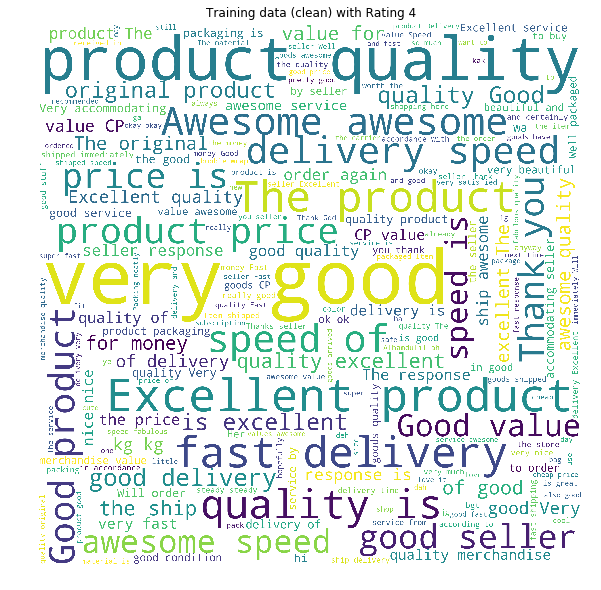

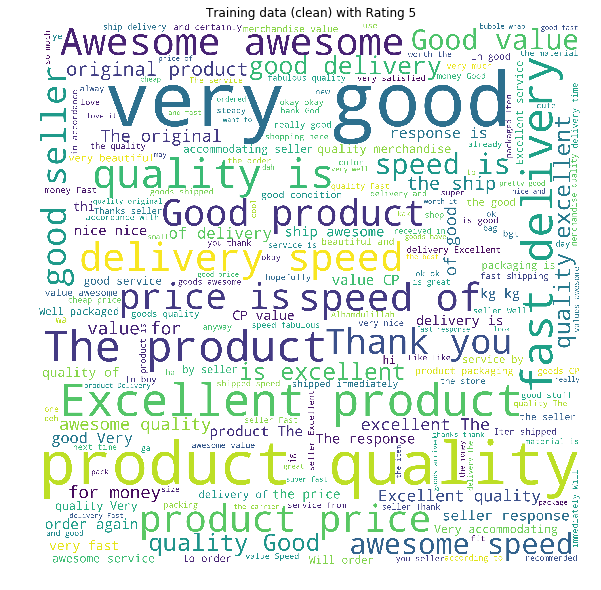

In [49]:
plot_wordcloud(train_df.loc[train_df.rating == 1, "clean text"], 'Training data (clean) with Rating 1')
plot_wordcloud(train_df.loc[train_df.rating == 2, "clean text"], 'Training data (clean) with Rating 2')
plot_wordcloud(train_df.loc[train_df.rating == 3, "clean text"], 'Training data (clean) with Rating 3')
plot_wordcloud(train_df.loc[train_df.rating == 4, "clean text"], 'Training data (clean) with Rating 4')
plot_wordcloud(train_df.loc[train_df.rating == 5, "clean text"], 'Training data (clean) with Rating 5')